read Taiwan geojson file (in Chinese)

In [1]:
# from geojsonio import display
# data source: https://github.com/g0v/twgeojson/tree/master/json
import json

file_name = 'input\\twCounty2010.geojson'

f = open(file_name, encoding='utf-8')

di_geojson = json.load(f)

f.close()

reference

In [2]:
# Geospatial data visualization in Jupyter Notebooks 
# https://medium.com/@bartomolina/geospatial-data-visualization-in-jupyter-notebooks-ffa79e4ba7f8
# 
# jupyterlab-geojson 3.3.1  https://pypi.org/project/jupyterlab-geojson/


dictionry of Chinese to English county names

In [3]:
di_taiwan_county_names = {
    '基隆市': 'Keelung',
    '台北市': 'Taipei',
    '新北市': 'New Taipei',
    '桃園縣': 'Taoyuan',
    '新竹縣': 'Hsinchu',
    '新竹市': 'Hsinchu City',
    '苗栗縣': 'Miaoli',
    '台中市': 'Taichung',
    '南投縣': 'Nantou',
    '彰化縣': 'Changhua',
    '雲林縣': 'Yunlin',
    '嘉義市': 'Chiayi City',
    '嘉義縣': 'Chiayi',
    '台南市': 'Tainan',
    '高雄市': 'Kaohsiung',

    '屏東縣': 'Pingtung',    
    '宜蘭縣': 'Yilan',
    '花蓮縣': 'Hualien',
    '台東縣': 'Taitung',

    '澎湖縣': 'Penghu',
    '金門縣': 'Kinmen',
    '連江縣': 'Lienchiang',
}

with open('data\\geojson\\TaiwanCounty_chinese_to_english.json', 'w') as fp   :
    json.dump(di_taiwan_county_names, fp)

convert Chinese county names to English

In [4]:
## replace Chinese county names to English
di_geojson2 = di_geojson.copy()

for i in range(len(di_geojson['features'])):
    county_name = di_geojson2['features'][i]['properties']['COUNTYNAME']
    di_geojson2['features'][i]['properties']['COUNTYNAME'] = di_taiwan_county_names[county_name]
    di_geojson2['features'][i]['properties']['name'] = di_taiwan_county_names[county_name]


## save the geojson files
import json

with open('data\\geojson\\twCountry2023.geojson', 'w') as fp   :
    json.dump(di_geojson2, fp)

dictionry of Taiwan's area and county

In [6]:
di_taiwan_country_area = {
    'north': ['Keelung', 'Taipei', 'New Taipei', 'Taoyuan', 'Hsinchu', 'Hsinchu City', 'Yilan'],
    'central': ['Miaoli', 'Taichung', 'Changhua', 'Nantou', 'Yunlin'],
    'south': ['Chiayi', 'Chiayi City', 'Tainan', 'Kaohsiung', 'Pingtung'],
    'east': ['Hualien', 'Taitung']
}

with open('data\\geojson\\TaiwanCounty_area.json', 'w') as fp   :
    json.dump(di_taiwan_country_area, fp)

group and merge geojson data by area

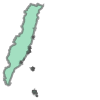

In [8]:
import json
import geojson
from functools import partial
import pyproj
import shapely.geometry
import shapely.ops

di_poly = {}

for area in di_taiwan_country_area.keys():
    for i in range(len(di_geojson2['features'])):
        if di_geojson2['features'][i]['properties']['COUNTYNAME'] in di_taiwan_country_area[area]:
            
            poly = shapely.geometry.shape(di_geojson2['features'][i]['geometry'])

            if area not in di_poly.keys():
                di_poly[area] = shapely.geometry.shape(poly)
            else:
                di_poly[area] = di_poly[area].union(poly)


convert polygons into a single geojson

In [17]:
import geopandas

geojson_area = geopandas.GeoSeries([di_poly[x] for x in di_poly.keys()]).__geo_interface__

## set COUNTYNAME and name of each polygon
for i in range(len(di_poly.keys())):
    area = list(di_poly.keys())[i]
    geojson_area['features'][i]['properties']['AREA_NAME'] = area
    geojson_area['features'][i]['properties']['name'] = area

export geojson file - Taiwan by area

In [18]:
with open('data\\geojson\\TaiwanArea.geojson', 'w') as fp   :
    json.dump(geojson_area, fp)

display area on map

In [19]:
import geopandas as gpd
import plotly.express as px
import json

geojson = geojson_area

gdf = gpd.GeoDataFrame.from_features(geojson)
point = (122, 23)

px.choropleth_mapbox(gdf,
                           geojson=gdf.geometry,
                           locations=gdf.index,
                           hover_name = 'name',
                           # color="name",
                           center={"lat": point[1], "lon": point[0]},
                           mapbox_style="open-street-map",
                           zoom=5)
